# Importing Libraries

In [1]:
!pip install pytesseract

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np


from skimage.feature import graycomatrix

from scipy.stats import entropy


In [3]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract
!pip install -U scikit-image
!pip install easyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6

In [6]:
!unzip /content/folder.zip -d /content/folder

Archive:  /content/folder.zip
  inflating: /content/folder/scanner dataset/Xerox_Versalink.PDF  
  inflating: /content/folder/scanner dataset/Brother.pdf  
  inflating: /content/folder/scanner dataset/kyocera-‎5‎.‎2‎.‎2025-‎11‎.‎28‎.‎59.pdf  


In [4]:
!pip install pdf2image pillow

In [5]:
!sudo apt install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (217 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126101 

# PDF --> IMAGE

In [7]:
import os
from pdf2image import convert_from_path
import cv2
import numpy as np

def extract_images_from_pdf(pdf_path, output_folder=None, dpi=300):
    images = []
    images_path=[]

    # Convert PDF pages to PIL images
    pil_images = convert_from_path(pdf_path, dpi=dpi)

    # Convert PIL images to OpenCV format
    for i, pil_img in enumerate(pil_images):
        # Convert PIL Image to numpy array
        cv_img = np.array(pil_img)
        # Convert RGB to BGR
        cv_img = cv_img[:, :, ::-1].copy()
        images.append(cv_img)

        if output_folder:
            os.makedirs(output_folder, exist_ok=True)
            output_path = os.path.join(output_folder, f"page_{i+1}.png")
            cv2.imwrite(output_path, cv_img)
            images_path.append(output_path)

    return images, images_path

In [8]:
pdf_path='/content/Xerox_Versalink.PDF'
output_folder = "extracted_images"
images, images_path = extract_images_from_pdf(pdf_path, output_folder)
print(images, images_path)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [9]:
def input_to_gray (imgPath):
  img = plt.imread(imgPath)
  gray = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2]
  return gray

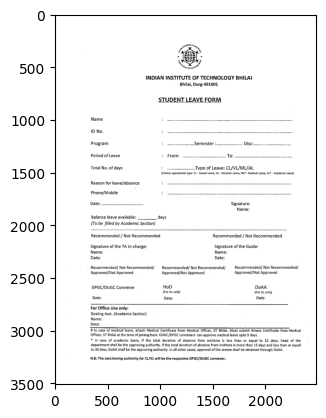

In [10]:
imgPath=images_path
for imgPath in imgPath:
    img = input_to_gray(imgPath)
    plt.imshow(img, cmap='gray')
    plt.show()

# Tesseract OCR

In [11]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

def extract_character_es(image_path):
    # Load image and preprocess
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binary inverse thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours (characters)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cropped_es = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # Ignore too small/large contours
        if h < 10 or w < 10 or h > 100 or w > 100:
            continue

        char_img = image[y:y+h, x:x+w]

        # Recognize character using Tesseract
        char_gray = cv2.cvtColor(char_img, cv2.COLOR_BGR2GRAY)
        char_resized = cv2.resize(char_gray, (30, 30))
        _, char_thresh = cv2.threshold(char_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        recognized = pytesseract.image_to_string(char_thresh, config='--psm 10 -c tessedit_char_whitelist=eE').strip()

        if recognized.lower() == 'e':
            cropped_es.append(char_img)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)

    # print(f"Found {len(cropped_es)} 'e's")
    # cv2_imshow(image)

    # for idx, e in enumerate(cropped_es):
    #     print(f"'e' #{idx+1}")
    #     cv2_imshow(e)

    return cropped_es


In [12]:
image_path=images_path
for img in image_path:
    print(len(extract_character_es(img)))

91


# GLCM Feature Extraction

In [13]:
def extract_glcm_features(images, distances=[1], angles=[0]):
    feature_list = []

    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (32, 32))  # Standard size
        glcm = graycomatrix(resized, distances=distances, angles=angles, symmetric=True, normed=True)
        P = glcm[:, :, 0, 0]

        # Marginal statistics
        px = np.sum(P, axis=1)
        py = np.sum(P, axis=0)
        mean_x = np.sum(px * np.arange(256))
        mean_y = np.sum(py * np.arange(256))
        var_x = np.sum((np.arange(256) - mean_x)**2 * px)
        var_y = np.sum((np.arange(256) - mean_y)**2 * py)

        # Energy
        energy = np.sum(P**2)

        # Entropies
        P_nonzero = P[P > 0]
        entropy1 = -np.sum(P_nonzero * np.log2(P_nonzero))
        entropy2 = entropy(P.flatten(), base=2)
        entropy3 = -np.sum(P * np.log2(P + 1e-10))  # epsilon added to avoid log(0)

        # Maximum entry
        max_entry = np.max(P)

        # Correlation metrics
        i, j = np.indices(P.shape)
        correlation1 = np.sum((i - mean_x) * (j - mean_y) * P) / (np.sqrt(var_x * var_y) + 1e-10)
        correlation2 = np.corrcoef(P.flatten(), (i * j).flatten())[0, 1] if P.size > 1 else 0

        # Difference histogram
        diff_hist = np.zeros(256)
        for m in range(256):
            for n in range(256):
                diff_hist[abs(m - n)] += P[m, n]
        diff_energy = np.sum(diff_hist**2)
        diff_entropy = -np.sum(diff_hist[diff_hist > 0] * np.log2(diff_hist[diff_hist > 0]))
        diff_inertia = np.sum((np.arange(256)**2) * diff_hist)
        diff_homogeneity = np.sum(diff_hist / (1 + np.arange(256)**2))

        # Sum histogram
        sum_hist = np.zeros(511)
        for m in range(256):
            for n in range(256):
                sum_hist[m + n] += P[m, n]
        sum_energy = np.sum(sum_hist**2)
        sum_entropy = -np.sum(sum_hist[sum_hist > 0] * np.log2(sum_hist[sum_hist > 0]))
        sum_variance = np.sum(((np.arange(511) - np.mean(sum_hist))**2) * sum_hist)
        sum_mean = np.sum(np.arange(511) * sum_hist)
        sum_cluster_shade = np.sum(((np.arange(511) - sum_mean)**3) * sum_hist)
        sum_cluster_prominence = np.sum(((np.arange(511) - sum_mean)**4) * sum_hist)

        features = [
            mean_x, mean_y, var_x, var_y,
            energy,
            entropy1, entropy2, entropy3,
            max_entry,
            correlation1, correlation2,
            diff_energy, diff_entropy, diff_inertia, diff_homogeneity,
            sum_energy, sum_entropy, sum_variance, sum_cluster_shade, sum_cluster_prominence
        ]
        feature_list.append(features)

    return np.array(feature_list)

In [ ]:
images=images_path
for img in images:
    print(extract_glcm_features(extract_character_es(img)))

[[ 9.23503024e+01  9.23503024e+01  7.87171449e+03 ...  6.47218850e+04
   2.59908236e+06  1.69722958e+09]
 [ 7.43689516e+01  7.43689516e+01  6.61441730e+03 ...  4.80913130e+04
   3.37222210e+06  1.58186492e+09]
 [ 9.83760081e+01  9.83760081e+01  8.25769330e+03 ...  7.08388811e+04
   2.50375077e+06  1.77577996e+09]
 ...
 [ 1.20643649e+02  1.20643649e+02  8.27178481e+03 ...  9.07484740e+04
   5.34137049e+05  1.70973574e+09]
 [ 1.76384073e+02  1.76384073e+02  7.99020128e+03 ...  1.54635670e+05
  -3.70079438e+06  1.84229899e+09]
 [ 1.26228327e+02  1.26228327e+02  7.19156531e+03 ...  9.15204786e+04
   1.73974436e+05  1.30729153e+09]]


In [14]:
def process_and_compare_images(folder_path):
    printer_features = {}

    # Get all PDF files in the folder
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf') or f.endswith('.PDF')]
    print(pdf_files)

    if not pdf_files:
        print(f"No PDF files found in the folder: {folder_path}")
        return printer_features

    for pdf_file in pdf_files:
        print(pdf_file)
        pdf_path = os.path.join(folder_path, pdf_file)
        output_folder = "extracted_images"
        images, images_path = extract_images_from_pdf(pdf_path, output_folder)
        printer_name = os.path.splitext(pdf_file)[0]  # Use filename without extension as printer name
        print(printer_name)

        # Extract features for each image
        features = []
        for image in images_path:
            cropped_es = extract_character_es(image)
            glcm_features = extract_glcm_features(cropped_es)
            features.append(np.mean(glcm_features, axis=0))  # Average features for the printer

        # Store the averaged features for the printer
        if features:
            printer_features[printer_name] = np.mean(features, axis=0)

    return printer_features

In [15]:
folder_path = "/content/folder/scanner dataset"
printer_features = process_and_compare_images(folder_path)
printer_features

['Brother.pdf', 'kyocera-\u200e5\u200e.\u200e2\u200e.\u200e2025-\u200e11\u200e.\u200e28\u200e.\u200e59.pdf', 'Xerox_Versalink.PDF']
Brother.pdf
Brother
kyocera-‎5‎.‎2‎.‎2025-‎11‎.‎28‎.‎59.pdf
kyocera-‎5‎.‎2‎.‎2025-‎11‎.‎28‎.‎59
Xerox_Versalink.PDF
Xerox_Versalink


{'Brother': array([1.43459509e+02, 1.43459509e+02, 4.02723555e+03, 4.02723555e+03,
        2.15968803e-03, 1.02155252e+01, 1.02155252e+01, 1.02155250e+01,
        3.25413768e-02, 9.61256167e-01, 4.83873879e-02, 4.91581556e-02,
        4.93233235e+00, 3.17490269e+02, 1.90358503e-01, 5.13925870e-03,
        8.13157363e+00, 9.85418378e+04, 4.29764361e+05, 4.60960002e+08]),
 'kyocera-\u200e5\u200e.\u200e2\u200e.\u200e2025-\u200e11\u200e.\u200e28\u200e.\u200e59': array([1.45368766e+02, 1.45368766e+02, 2.40341707e+03, 2.40341707e+03,
        2.08323665e-03, 1.02642341e+01, 1.02642341e+01, 1.02642339e+01,
        3.38541667e-02, 9.64809855e-01, 4.45244753e-02, 5.44163738e-02,
        4.62059452e+00, 1.71821566e+02, 1.79080728e-01, 5.54223777e-03,
        7.97757523e+00, 9.42302201e+04, 2.45734719e+05, 1.78335256e+08]),
 'Xerox_Versalink': array([1.16267397e+02, 1.16267397e+02, 8.78849392e+03, 8.78849392e+03,
        3.46477230e-02, 7.83663090e+00, 7.83663090e+00, 7.83663078e+00,
        1.365

In [ ]:
# def compare_image_to_printer(image, printer_features):
#     cropped_es = extract_character_es(image)
#     glcm_features = extract_glcm_features(cropped_es)
#     avg_features = np.mean(glcm_features, axis=0)

#     # Compare with stored printer features
#     min_diff = float('inf')
#     closest_printer = None

#     for printer, features in printer_features.items():
#         diff = np.linalg.norm(avg_features - features)
#         if diff < min_diff:
#             min_diff = diff
#             closest_printer = printer

#     return closest_printer

In [ ]:
# new_image = "/content/extracted_images/page_1.png"
# closest_printer = compare_image_to_printer(new_image, printer_features)
# print(f"The closest matching printer is: {closest_printer}")

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter

In [17]:
# Feature Selection
def select_features(X, y, n_features=5):
    lda = LinearDiscriminantAnalysis()
    sfs = SequentialFeatureSelector(lda, n_features_to_select=n_features, direction='forward', cv=3)
    sfs.fit(X, y)
    return sfs

In [18]:
# Feature Reduction
def reduce_features(X, y, n_components=None):
    max_components = min(X.shape[1], len(np.unique(y)) - 1)
    if n_components is None or n_components > max_components:
        n_components = max_components

    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_reduced = lda.fit_transform(X, y)
    return lda, X_reduced

In [19]:
# Feature Scaling
def scale_features(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_scaled = scaler.fit_transform(X)
    return scaler, X_scaled

# Prediction

In [20]:
# Distance-based Classifier
class DistanceClassifier:
    def __init__(self):
        self.class_centers = {}
        self.thresholds = {}

    def fit(self, X, y):
        classes = np.unique(y)
        for cls in classes:
            X_cls = X[y == cls]
            center = X_cls.mean(axis=0)
            distances = np.linalg.norm(X_cls - center, axis=1)
            threshold = distances.mean() + distances.std()
            self.class_centers[cls] = center
            self.thresholds[cls] = threshold

    def predict(self, X):
        predictions = []
        for x in X:
            min_dist = float('inf')
            pred_class = 'unknown'
            for cls, center in self.class_centers.items():
                dist = np.linalg.norm(x - center)
                if dist < self.thresholds[cls] and dist < min_dist:
                    min_dist = dist
                    pred_class = cls
            predictions.append(pred_class)
        return predictions

In [21]:
# Majority Voting
def majority_vote(predictions):
    if not predictions:
        return None
    return Counter(predictions).most_common(1)[0][0]

In [22]:
# Classification
def classify_printer(image_path, printer_features):
    # Extract cropped 'e's
    es = extract_character_es(image_path)
    if not es:
        print("No 'e' characters found.")
        return None, None

    # Extract GLCM features
    features = extract_glcm_features(es)
    if len(features) == 0:
        print("No features extracted.")
        return None, None

    # Prepare data for classification
    X_test = np.mean(features, axis=0).reshape(1, -1)  # Average features for all 'e's in the image

    # Prepare printer data
    printer_names = list(printer_features.keys())
    X_train = np.array([printer_features[name] for name in printer_names])
    y_train = np.array(range(len(printer_names)))  # Using indices as labels

    # If we have only one sample per class, use simple distance comparison
    if len(printer_names) <= 1:
        return None, None

    # Feature selection
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold()
    try:
        X_train_selected = selector.fit_transform(X_train)
        X_test_selected = selector.transform(X_test)
    except:
        # If variance threshold fails, use all features
        X_train_selected = X_train
        X_test_selected = X_test

    # Feature reduction
    try:
        lda = LinearDiscriminantAnalysis(n_components=min(len(printer_names)-1, X_train_selected.shape[1]))
        X_train_reduced = lda.fit_transform(X_train_selected, y_train)
        X_test_reduced = lda.transform(X_test_selected)
    except:
        # If LDA fails, use PCA or no reduction
        from sklearn.decomposition import PCA
        pca = PCA(n_components=min(len(printer_names)-1, X_train_selected.shape[1]))
        X_train_reduced = pca.fit_transform(X_train_selected)
        X_test_reduced = pca.transform(X_test_selected)

    # Scaling
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Classification using simple distance comparison
    distances = np.linalg.norm(X_train_scaled - X_test_scaled, axis=1)
    min_dist_idx = np.argmin(distances)
    min_dist = distances[min_dist_idx]

    # Calculate threshold as mean + std of distances between training samples
    if len(printer_names) > 1:
        pairwise_dist = []
        for i in range(len(X_train_scaled)):
            for j in range(i+1, len(X_train_scaled)):
                pairwise_dist.append(np.linalg.norm(X_train_scaled[i] - X_train_scaled[j]))
        threshold = np.mean(pairwise_dist) + np.std(pairwise_dist)
    else:
        threshold = 0

    if min_dist < threshold:
        predicted_printer = printer_names[min_dist_idx]
    else:
        predicted_printer = None

    return predicted_printer, X_test_scaled

In [23]:
def main_workflow(test_image_path,printer_features):

    # Classify test image
    predicted_printer, _ = classify_printer(test_image_path, printer_features)

    print(f"\nClassification Result:")
    if predicted_printer:
        print(f"The test image most likely came from: {predicted_printer}")
    else:
        print("Could not determine the source printer.")

    return predicted_printer

In [24]:
test_image_path = "/content/extracted_images/page_1.png"  # Image you want to classify
predicted_printer = classify_printer(test_image_path, printer_features)
print(f"Predicted printer: {predicted_printer}")

Predicted printer: ('Xerox_Versalink', array([[ 1.        , -0.26901366]]))
